In [1]:
import pandas as pd
import os
import pyprind
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support as score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from wordcloud import WordCloud,STOPWORDS
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('CustomerProductReview.csv')
data.head(3)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


In [3]:
df=data[['brand','categories','dateAdded','dateUpdated','reviews.rating','reviews.sourceURLs','reviews.text','reviews.title','reviews.username']]
df.head(3)

,brand,categories,dateAdded,dateUpdated,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman


In [4]:
for column in df[['reviews.sourceURLs']]:
    columnSeriesObj = df[column]
    print('Colunm Name : ', column)
    #print('Column Contents : ', columnSeriesObj.values)
    colSeriesValue=columnSeriesObj.values
    #print('colSeriesValue: ',colSeriesValue)
    merchant=''
    merchant_array = np.empty(0) 
    for colvalue in colSeriesValue:
       substring_list=["bestbuy","amazon","walmart"]
       #merchant=next(substring for substring in substring_list if substring in colValue)
       for substring in substring_list: 
                if substring in colvalue:
                   merchant=substring
       
       merchant_array = np.append(merchant_array, [merchant], axis=0)
   

    data = df.assign(merchant = merchant_array)

Colunm Name :  reviews.sourceURLs


In [5]:
df=data
df.head(5)

,brand,categories,dateAdded,dateUpdated,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,merchant
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,bestbuy
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,bestbuy
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,bestbuy
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,bestbuy
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,bestbuy


In [6]:
df['reviews.rating'] = df['reviews.rating'].fillna(0)
df['reviews.title'] = df['reviews.title'].fillna('')
df['reviews.text'] = df['reviews.text'].fillna('')

In [7]:
import string

### CLEANING

In [8]:
#Removing punctuations from entire dataset
punc_set = string.punctuation
punc_set

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
#Function for removing punctions
def remove_punc(text):
    clean = "".join([x.lower() for x in text if x not in punc_set])
    return clean

#Applying the 'remove_punc' function to entire dataset
df['no_punc'] = df['reviews.text'].apply(lambda z:remove_punc(z))

In [10]:
#Function for Tokenizing entire data for representing every word as datapoint
def tokenize(text):
    tokens = re.split("\W+",text)
    return tokens

#Applying the 'tokenize' function to entire dataset
df['tokenized_Data'] = df['no_punc'].apply(lambda z:tokenize(z))

In [11]:
#Importing stopwords from NLTK Library to remove stopwords now that we have tokenized it
stopwords = nltk.corpus.stopwords.words('english')

#Function for removing stopwords from single row
def remove_stopwords(tokenized_words):
    Ligit_text=[word for word in tokenized_words if word not in stopwords]
    return Ligit_text

#Applying the function 'remove_stopwords' from the entire dataset
df["no_stop"] = df["tokenized_Data"].apply(lambda z:remove_stopwords(z))

In [12]:
#Importing 'WordNetLemmatizer' as lemmatizing function to find lemma's of words
wnl = nltk.wordnet.WordNetLemmatizer()

#Function for lemmatizing the tokenzied text
def lemmatizing(tokenized_text):
    lemma = [wnl.lemmatize(word) for word in tokenized_text]
    return lemma

#Applying the 'lemmatizing' function to entire dataset     
df['lemmatized'] = df['no_stop'].apply(lambda z:lemmatizing(z))

df['lemmatized'] = [" ".join(review) for review in df['lemmatized'].values]

df.head()

,brand,categories,dateAdded,dateUpdated,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,merchant,no_punc,tokenized_Data,no_stop,lemmatized
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,bestbuy,this keyboard is very easy to type on but the ...,"[this, keyboard, is, very, easy, to, type, on,...","[keyboard, easy, type, fingerprint, reader, be...",keyboard easy type fingerprint reader best fea...
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,bestbuy,its thin and light i can type pretty easily on it,"[its, thin, and, light, i, can, type, pretty, ...","[thin, light, type, pretty, easily]",thin light type pretty easily
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,bestbuy,i love the new design the keys are spaced well...,"[i, love, the, new, design, the, keys, are, sp...","[love, new, design, keys, spaced, well, mis, t...",love new design key spaced well mi type finger...
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,bestbuy,attached easily and firmly has a nice feel a m...,"[attached, easily, and, firmly, has, a, nice, ...","[attached, easily, firmly, nice, feel, must, s...",attached easily firmly nice feel must surface pro
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,bestbuy,our original keyboard was okay but did not hav...,"[our, original, keyboard, was, okay, but, did,...","[original, keyboard, okay, laptop, feel, bit, ...",original keyboard okay laptop feel bit floppy ...


In [13]:
from textblob import TextBlob
from nltk.corpus import stopwords
import string
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn import cluster

In [14]:
# Let's create our feature vector as Kmeans works with numerical values only
# thus we need to convert our text data into numeric features in some way which should 
# prove usful to our learning algorithm and it can easily find pattern in it.
# So, i will be using polarity score of the extracted adjectives as our feature

def create_polarity_vector(all_adjectives):
    # NLTK Vader sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    #Taking compound score as one feature, (compund score = -ve indicates negative sentiments)
    #(compund score = +ve indicates positive sentiments, ie compound value is normalization b/w +ve and -ve)
    feature_vector=[1 if sid.polarity_scores(i)['compound']>=0 else -1 for i in all_adjectives]
    
    return feature_vector

In [15]:
# utility function to extract all adjectives from text document
def extract_adjectives(text):
    tokenized_text= nltk.word_tokenize(text)
    tagged_text = nltk.pos_tag(tokenized_text)
    all_adjectives = list({i[0] for i in tagged_text if i[1] == 'JJ'})
    return all_adjectives

In [16]:
# Cleaning up text 
def clean_text(text):    
    
    #stopword removal
    stop_word=list(stopwords.words('english'))
    toke=list(text.split(' '))
    text = ' '.join([i for i in toke if i not in stop_word])
    
    #punctutaion removal
    t_lator=str.maketrans('','',string.punctuation)
    text=text.translate(t_lator)
    remove_digits = str.maketrans('', '', string.digits)
    text = text.translate(remove_digits)    
    
    #removing special symbol
    for i in '“”—':
        text = text.replace(i, ' ')
        
    return text

In [17]:
for column in df[['reviews.text']]:
    columnSeriesObj = df[column]
    colSeriesValue=columnSeriesObj.values

    sentiment_array = np.empty(0)
    sentiment_array=sentiment_array.astype(int)
    for colvalue in colSeriesValue:
        
        text = clean_text(colvalue)
        adjectives = extract_adjectives(text)
        print('\nadjectives: ', adjectives)
        features = create_polarity_vector(adjectives)
        print('\nfeatures: ', features)
        neg=''
        sentiment=''
        for fea in features:
            print('\nfea: ', fea)
            if fea==-1:
                 neg='yes'
                 break
        
        if neg == 'yes':
            sentiment = 0
        else:
            sentiment = 1
        
                
        sentiment_array = np.append(sentiment_array, [sentiment], axis=0)

    df = df.assign(sentiment = sentiment_array)
                    


adjectives:  ['easy', 'accurate']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['thin']

features:  [1]

fea:  1

adjectives:  ['surface', 'new']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['nice']

features:  [1]

fea:  1

adjectives:  ['laptop', 'new', 'original', 'floppy', 'solid']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['original', 'fingerprint', 'handy', 'pro']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['use', 'comfortable']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['fine', 'Good']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['pro', 'tough']

features:  [1, -1]

fea:  1

fea:  -1

adjectives:  ['free', 'huge']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['accessory', 'pro']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['thin', 'scan', 'build', 'Overall', 'tactile', 'good', 'typecover', 'rigid', 'normal', 'bend

adjectives:  ['pro', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['accessory', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['new', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['full', 'scan', 'possible']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['special', 'trackpad', 'hardware', 'second', 'btw', 'great', 'first']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['surface']

features:  [1]

fea:  1

adjectives:  ['password', 'pro']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['whole', 'fingerprint', 'surface', 'outstanding', 'true', 'great', 'pro']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['Surface', 'substantial', 'wrong']

features:  [1, 1, -1]

fea:  1

fea:  1

fea:  -1

adjectives:  ['works', 'stupid', 'great']

features:  [1, -1, 1]

fea:  1




adjectives:  ['overall', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good', 'tablet']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['skin', 'hot', 'trivet']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['reasonable', 'standard', 'great', 'Good']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['temperamental', 'frustrating']

features:  [1, -1]

fea:  1

fea:  -1

adjectives:  ['new', 'upgrade', 'original', 'superior', 'much', 'touchpad', 'spacing']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['great', 'extra']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['easy', 'quick', 'magnetic']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['type', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['added', 'key', 'personal', 'work']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

ad

fea:  1

fea:  1

adjectives:  ['many', 'great', 'magnetic']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['returned', 'pro', 'basic', 'happy']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['different', 'fingerprint', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['cover']

features:  [1]

fea:  1

adjectives:  ['surface', 'search', 'happy', 'onscreen', 'great', 'first', 'regular', 'cover']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  ['keep', 'much', 'long', 'great', 'pro']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['additional']

features:  [1]

fea:  1

adjectives:  ['Happy']

features:  [1]

fea:  1

adjectives:  ['quiet', 'last']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['right', 'great']

features:  [1, 1]

fea:  1

fea:  1

adje

adjectives:  ['Simple', 'easy', 'nice']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['complete', 'superb', 'portable', 'Foldable', 'great']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['Great', 'unfortunately']

features:  [1, -1]

fea:  1

fea:  -1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['regular', 'use']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['previous', 'new', 'good', 'happy', 'great', 'keyboardkey', 'material']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['extra']

features:  [1]

fea:  1

adjectives:  ['black', 'swipe']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['necessary', 'Good', 'convenient']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['useless', 'great']

features:  [-1, 1]

fea:  -1

adjectives:  []

features:  []

adjec


features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['horrible', 'first', 'clean', 'tricky', 'dirty', 'crisp']

features:  [-1, 1, 1, -1, -1, 1]

fea:  -1

adjectives:  ['beautiful', 'happy', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['old', 'creative', 'productive', 'aesthetic']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['present', 'important', 'classy', 'professional', 'feel', 'great', 'cover']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['Overall', 'surface', 'decide', 'gray', 'wonderful', 'luxurious', 'expensive', 'keysThe', 'chemical', 'pro', 'weird', 'extra']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 

fea:  1

adjectives:  ['Great']

features:  [1]

fea:  1

adjectives:  ['good', 'audio', 'anticipated', 'solved', 'powerful', 'low']

features:  [1, 1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['valueProblem', 'perfectGreat', 'sound', 'first', 'several', 'great', 'remote']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['good', 'awesome']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['Great']

features:  [1]

fea:  1

adjectives:  ['multiple', 'sound', 'true', 'good', 'treble', 'infrared', 'distinguish', 'enough', 'input', 'high']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['laptop', 'small', 'great', 'first']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['amazing']

features:  [1]

fea:  1

adjectives:  ['sound',

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['little', 'good', 'nice']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['amazing', 'nervous']

features:  [1, -1]

fea:  1

fea:  -1

adjectives:  ['little', 'full', 'short', 'kit', 'nice', 'long', 'easy']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['clean', 'like']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['pleased', 'confident', 'safe', 'inch']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  ['secureHavent', 'televisionDid', 'experienced', 'flat']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['type']

features:  [1]

fea:  1

adjectives:  ['big', 'many', 'good', 'tilt', 'keep', 'tricky', 'panasonic', 'side', 'imagine', 'much', 'leave', 'worked', 'ityou', 'huge', 'different', 'becuase', 'sure', 'versus']

features:  [1, 1, 1, 1, 1, -1, 1

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['super', 'happy', 'pull', 'double', 'slim', 'great', 'easy', 'wall']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['little', 'confident', 'concerned', 'mount']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['happy', 'expensive']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['disappointed', 'exact', 'new', 'large', 'screen']

features:  [-1, 1, 1, 1, 1]

fea:  -1

adjectives:  ['old', 'actual', 'good', 'perfect', 'nice', 'oneKudos', 'long', 'specific', 'Many', 'short', 'slim', 'reliable', 'dubious', 'specs', 'outstanding', 'tilt', 'heavy', 'mount', 'dead', 'rails', 'website', 'full', 'screw', 'smooth', 'due', 'bottom', 'different', 'stiff', 'low', 'poor']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['necessary', 'Strong', 'great', 'sturdy', 'flat']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['different', 'weak', 'strong', 'pull', 'hold', 'stool', 'screen', 'confident']

features:  [1, -1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  -1

adjectives:  []

features:  []

adjectives:  ['perfect', 'pull', 'flexible', 'easy', 'wit', 'swivel']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['much', 'nice']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['useful', 'large', 'flat']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['Overall', 'high', 'flat']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['Excellent', 'high']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['little', 'incredible', 'good', 'plenty', 'sounding', 'nice', 'long', 'overall', 'free', 'poolside', 'stated', 'great', 'app', 'easy', 'outstanding', 'speaker', 'chosen


fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['little', 'multiple', 'incredible', 'nice', 'important', 'feel', 'first', 'cumbersome', 'acoustic', 'listen', 'app', 'high', 'experienceThe', 'pleasurable', 'heavy', 'beautiful', 'solid', 'huge', 'classic', 'full', 'low']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  []

features:  []

adjectives:  ['waterproof', 'helpful', 'perfect', 'full', 'Wish', 'adequate']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['incredible']

features:  [1]

fea:  1

adjectives:  ['little', 'multiple', 'main', 'nice', 'future', 'first', 'give', 'immediate', 'WiFicapable', 'great', 'upgrade', 'fine', 'stream', 'able', 'wrong', '


features:  [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['waterproof', 'good', 'overpriced', 'nice', 'much', 'patio', 'impressive', 'first']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['lasting']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['bad', 's', 'incredible', 'good', 'Previous', 'incorporate']

features:  [-1, 1, 1, 1, 1, 1]

fea:  -1

adjectives:  ['m', 'happy', 'portable', 'clear', 'crisp', 'easy']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['nice', 'guess', 'black', 'remote', 'wireless', 'whole', 'scramble', 'great', 'sweet', 'high', 'make', 'personal', 'clear', 'smart', 'wish', 'got', 'ta', 'different', 'resistant']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

adjectives:  ['little', 'big', 'lens', 'multiple', 'many', 'compartment', 'comfortable', 'main', 'complaint', 'careful', 'want', 'possible', 'attached', 'front', 'cumbersome', 'moderate', 'sturdy']

features:  [1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  []

features:  []

adjectives:  ['plenty']

features:  [1]

fea:  1

adjectives:  ['designed', 'right']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['added', 'nice']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['overall', 'Amazing']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['type', 'nice', 'extra']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['lots', 'small']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['Good', 'alot']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['easy', 'great', 'wear', 'comfortable']

features:  [1, 1, 1, 1]

fea:  1

fea:  1




adjectives:  ['adapter', 'tiny', 'handy', 'separate', 'happy', 'wear', 'huge', 'rough', 'top', 'personal', 'professional', 'long', 'great', 'carry', 'handle', 'steady']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['bag', 'fantastic', 'comfortable', 'perfect', 'primary', 'entire', 'top']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['gear', 'open', 'full', 'keep', 'belt', 'portable', 'useful', 'Good', 'small', 'pouch']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['backpack', 'strap', 'attached', 'love', 'removable', 'pouch']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjecti

adjectives:  ['compatible']

features:  [1]

fea:  1

adjectives:  ['unacceptable', 'empty', 'open', 'new', 'minutesNumerous', 'next', 'responsive', 'dread', 'd', 'spend']

features:  [-1, -1, 1, 1, 1, 1, 1, -1, 1, 1]

fea:  -1

adjectives:  []

features:  []

adjectives:  ['worth', 'Good', 's']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['last', 'original', 'tested', 'several', 'different', 'clear', 'right']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy', 'perfect', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['mac']

features:  [1]

fea:  1

adjectives:  ['little', 'desktop', 'able', 'Worth']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['little', 'easy', 'install', 'intimidating']

features:  [1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['upgrade', 'noticeable', 'new']

features:  [1,

features:  [1]

fea:  1

adjectives:  ['little', 'sound', 'last', 'lightweight', 'lasting', 'long', 'great']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy', 'Good', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'enough', 'ok']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['compare', 'dynamic', 'small', 'impressive', 'great', 'clear']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['good', 'useful', 'punch']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['daily', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['disappointed']

features:  [-1]

fea:  -1

adjectives:  ['able', 'great']

features:  [1, 1]

fea:  1

fea:  1

adje

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['old', 'expensive']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['good', 'blue', 'connectivity', 'first']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['portable', 'low', 'high', 'Sleek']

features:  [1, -1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['good', 'Good', 'last', 'expensive']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['operate', 'laptop', 'direct', 'Easy', 'good']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['useful', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['Excellent']

features:  [1]

fea:  1

adjectives:  ['clear', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['Clear']

features:  [1]

fea:  1

adjectives:  ['simple']

featur

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['much', 'compact', 'slow']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['public', 'secure']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['portable', 'easy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['many', 'new', 'apartment', 'signal', 'sleep']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['full', 'able']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good', 'easy', 'compact']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['new']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['important']

features:  [1]

fea:  1

adjectives:  ['many']

features:  [1]

fea:  1

adjectives:  ['whole', 'good', 'wifi', 'nice', 'fine', 'close', 'representative', 'able']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['internet

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['new', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['different']

features:  [1]

fea:  1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['sound', 'online', 'installed', 'small', 'great', 'faceplate', 'removable', 'pumps']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['noticeable', 'improved', 'usb', 'audio', 'easy', 'free']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['iPhone', 'flash', 'iheart', 'need', 'great']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['much', 'instant', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['great


features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['sound', 'told', 'give', 'double', 'great']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['little', 'underwhelmed', 'new', 'bad', 'inexpensive', 'tricky', 'warm', 'much', 'audio', 'great', 'smoothlya']

features:  [1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['easy', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['plug', 'Clear', 'affordable', 'loud']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['recent', 'factory', 'great', 'quality', 'pair']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['new']

features:  [1]

fea:  1

adjectives:  ['install', 'sound', 'happy', 'great']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['Treble', 


features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['puppy']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['spare']

features:  [1]

fea:  1

adjectives:  ['perfect', 'original']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['previous', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['big', 'adapter', 'spare', 'stop', 'plug', 'different']

features:  [1, 1, 1, -1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['correct', 'alright', 'several', 'included', 'electronic', 'available', 'different']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['different', 'Good']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['hot']

features:  [1]

fea:  1

adjectives:  ['new']

features:  [1]

fea:  1

adjectives:  ['model', 'whereas', 'laptop', 'serial', 'essential', 'original', 'desperate', 'extra']


adjectives:  []

features:  []

adjectives:  ['ryzen', 'Good', 'first']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['able', 'ram']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  []

features:  []

adjectives:  ['good', 'ready']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['played']

features:  [1]

fea:  1

adjectives:  ['new']

features:  [1]

fea:  1

adjectives:  ['upgrade', 'sure', 'make']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'right']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['good', 'first']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['become', 'little', 'wide', 'macro', 'tight', 'desktop', 'large', 'sluggish', 'bog']

features:  [1, 1, 1, 1, 1, 1, 1, -1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  []

features:  []

adjectives:  ['safe']

features:  [1]

fea:  1

adjectives:  ['local', 'G


adjectives:  ['bunch']

features:  [1]

fea:  1

adjectives:  ['build', 'happy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['install']

features:  [1]

fea:  1

adjectives:  ['happy']

features:  [1]

fea:  1

adjectives:  ['available', 'sure']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['cheap', 'easy', 'loose', 'noticeWould']

features:  [1, 1, -1, 1]

fea:  1

fea:  1

fea:  -1

adjectives:  ['compatible', 'intensive']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['bad', 'comparable']

features:  [-1, 1]

fea:  -1

adjectives:  ['available', 'wait']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good', 'local']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['pretty']

features:  [1]

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['Excellent', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['crucial']

features:  [1]

fea:  1

adjectives:  ['heavy']

features:  [1]

fea:  1

adject


features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['new']

features:  [1]

fea:  1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['multiple', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['long', 'wonderful', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['rough']

features:  [1]

fea:  1

adjectives:  ['install', 'easy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['amazing', 'big', 'install']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['freezes', 'much', 'small', 'great', 'easy', 'screen', 'right']

features:  [-1, 1, 1, 1, 1, 1, 1]

fea:  -1

adjectives:  ['Wild', 'great', 'Easy']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['weekslong', 'recent', 'technical', 'frequent', 'personal', 'viable', 'able']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['great']

feat

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['great', 'large', 'advertised', 'screen', 'iPhoneiPad']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy', 'slinkbox', 'help']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['expensive']

features:  [1]

fea:  1

adjectives:  ['little', 'component', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['expensive']

features:  [1]

fea:  1

adjectives:  ['slingbox', 'several', 'great', 'easy', 'able']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['old', 'native', 'quick', 'slow', 'much', 'great', 'local', 'easy', 'rare', 'able', 'high']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['wherever']

features:  [1]

fea:  1

adjectives:  ['good', 'concept', 'great']

featur

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['free']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['good', 'signal', 'laptop', 'great']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['tv']

features:  [1]

fea:  1

adjectives:  ['perfect', 'easy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['last', 'new']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['portable', 'internet']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['amazing', 'able']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['third', 'several', 'expensive', 'first']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['rewire', 'able', 'picture']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['come', 'future', 'alot', 'smart', 'enjoyabl']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['enjoy']

featu

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['old', 'component', 'new', 'Good']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['many']

features:  [1]

fea:  1

adjectives:  ['want']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['skeptical', 'first']

features:  [-1, 1]

fea:  -1

adjectives:  ['upgrade', 'original', 'due']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['much', 'monthly', 'stream', 'large', 'effective', 'extra']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['little', 'add', 'able']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['original', 'incredible', 'nice']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['little', 'graphic', 'apps', 'learn', 'intuitive', 'intrusive', 'specific', 'free', 'box', 'virtual', 'onscreen', 'great', 'app', 'second', 'skip', 'c


features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['Big', 'online', 'intuitive', 'portable', 'controllable']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['loud']

features:  [1]

fea:  1

adjectives:  ['smart', 'second', 'outstanding']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['small']

features:  [1]

fea:  1

adjectives:  ['convenient', 'optional', 'full', 'mHz', 'nice', 'several', 'audio', 'Walkman', 'available', 'quality']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['stereo', 'full']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['different', 'quiet', 'long']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['sound', 'several', 'onscreen', 'Good', 'regular', 'great', 'connect', 'cant', 'blue', 'app']

features:  [1, 1

adjectives:  ['little', 'distorted', 'heavy', 'Good', 'small']

features:  [1, -1, 1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['little', 'distorted', 'heavy', 'Good', 'small']

features:  [1, -1, 1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['incredible', 'happy', 'nice', 'portable', 'small', 'clear', 'extra']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['comparable', 'good', 'portable', 'internal', 'first', 'wireless', 'box', 'listen', 'update', 'high', 'tired', 'audio', 'iPod', 'sound', 'new', 'usb', 'adjust', 'crisper', 'low']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['little', 'portable', 'excellent', 'such', 'focused', 'wireless', 'pick', 'sourceOne', 'touted', 'kHz', 'great', 'quality', 'second', 'guy', 'superior', 'audio', 'smart', 'proprietary', 'stereo', 'significant', 're


adjectives:  []

features:  []

adjectives:  ['able', 'happy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['Excellent']

features:  [1]

fea:  1

adjectives:  ['reliable', 'public']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['Good']

features:  [1]

fea:  1

adjectives:  ['clear', 'easy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['many', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['high']

features:  [1]

fea:  1

adjectives:  ['Inexpensive']

features:  [1]

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['mini', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['fine', 'many', 'last', 'great']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['hard']

features:  [-1]

fea:  -1

adjectives:  ['glad', 'happy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['reliable']

features:  [1]

fea:  1

adje

fea:  1

adjectives:  []

features:  []

adjectives:  ['several', 'experienceif', 'combine']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['actual', 'thin', 'strong', 'deep', 'deepest']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['cheap', 'smallish', 'further', 'emphasize', 'mixed', 'GREAT', 'good', 'excellent', 'compliement', 'previous', 'customizable', 'high', 'last', 'heavy', 'classy', 'iOS', 'full', 'ridiculous', 'capable', 'compatible']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['drive', 'external', 'much', 'hard']

features:  [1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['degree', 'past', 'aware']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1


features:  [1]

fea:  1

adjectives:  ['Overall', 'happy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['hard', 'change', 'correct', 'nice']

features:  [-1, 1, 1, 1]

fea:  -1

adjectives:  ['sound', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['future', 'updates', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['correct', 'iLX', 'future', 'minimalist', 'passOverall', 'iPhone', 'wireless', 'wifi', 'din', 'update', 'great', 'prepared', 'capacitive', 'able', 'Alpine', 'stereo', 'iOS', 'big', 'compatible', 'expensive', 'physical']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['little', 'many', 'apps']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['thirdparty', 'different']

features:  [1, 1]



features:  [1]

fea:  1

adjectives:  ['full', 'perfect', 'incar', 'infotainment']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['Much']

features:  [1]

fea:  1

adjectives:  ['hear', 'general', 'favorite', 'high']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['hear', 'enough', 'great', 'Wish']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['little', 'discs', 'pre']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'head', 'disappointed', 'interested']

features:  [1, 1, -1, 1]

fea:  1

fea:  1

fea:  -1

adjectives:  ['stereo', 'connect', 'good', 'cool']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  ['needs']

features:  [1]

fea:  1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  ['utilizes', 'shallow', 

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['worth', 'extra']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['easy', 'efficient']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['new', 'nice']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['light', 'update']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['desktop', 'last', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['Happy', 'old', 'slow']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['fine']

features:  [1]

fea:  1

adjectives:  ['little', 'many', 'current', 'slow', 'low', 'great', 'video', 'similar', 'allow', 'extra']

features:  [1, 1, 1, 1, -1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['old', 'short', 'internet', 'great', 'flakey']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['upgrade', 'solid', 'possible']

features:  [1, 1, 1]

fea:  


features:  [1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['bluetooth', 'sound', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['different', 'soft', 'happy', 'much', 'wish', 'ear']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['little', 'unsecured', 'sound', 'mindful', 'good', 'Other', 'secure', 'everyday', 'tight']

features:  [1, -1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['cheap', 'sound', 'Ipod', 'good', 'listen', 'excellent', 'worry', 'quality', 'goThe']

features:  [1, 1, 1, 1, 1, 1, -1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['good', 'blue']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good', 'acceptable', 'difficult']

features:  [1, 1, -1]

fea:  1

fea:  1

fea:  -1

adjectives:  ['sound', 'ear', 'wrong']

features:  [1, 1, -1]

fea:  1

fea:  1

fea:  -1

a

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['sound', 'jugg', 'poor']

features:  [1, 1, -1]

fea:  1

fea:  1

fea:  -1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['clear', 'high']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['old', 'fit', 'pairs', 'downfall', 'ear']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy', 'nice']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['little', 'fragile', 'extended', 'simple', 'safe', 'connect', 'easy', 'able']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['good', 'stay', 'headuseless']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['little', 'many', 'wired', 'e', 'lose', 'fine', 'great', 'blue']

features:  [1, 1, 1, 1, -1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea


features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['affordable', 'great', 'nice']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['fuss', 'connected', 'adequate', 'small']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['wifi', 'disable', 'simple', 'utilizing', 'rapid', 'small', 'inch', 'different', 'accurate']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['wide', 'width', 'nice']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['great', 'apps']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['friendly', 'new', 'exceptional']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['little']

features:  [1]

fea:  1

adjectives:  ['special', 'black', 'great', 'easy', 'worn']

features:  [1, 1, 1, 1, 


features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['kindle', 'read']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['Great']

features:  [1]

fea:  1

adjectives:  ['large']

features:  [1]

fea:  1

adjectives:  ['good', 'Good']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['Good', 'open']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['old', 'many', 's', 'new', 'clear', 'smart']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['clear', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['free', 'update', 'competitive', 'firmware']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['new', 'web', 'keep', 'happy', 'checked', 'thel', 'cheapo', 'small', 'right', 'amazon']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['old', 'surprised', 'new', 'happy']

features:  [1, 1, 1, 1]

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['clear', 'easy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['old', 'refresh', 'horrible', 'much', 'pixilated']

features:  [1, 1, -1, 1, 1]

fea:  1

fea:  1

fea:  -1

adjectives:  ['Great']

features:  [1]

fea:  1

adjectives:  ['beautiful']

features:  [1]

fea:  1

adjectives:  ['clear', 'last']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['clear', 'crystal']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['wide']

features:  [1]

fea:  1

adjectives:  ['old', 'several', 'type', 'top', 'table', 'great', 'solid', 'different', 'easy', 'wall']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'happy', 'm']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['p


features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['fire', 'bought', 'tired']

features:  [-1, 1, -1]

fea:  -1

adjectives:  []

features:  []

adjectives:  []

features:  []

adjectives:  ['fit', 'same', 'solid', 'wide', 'certain']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good', 'clear', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['excellent']

features:  [1]

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['overdue', 'happy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['friendly', 'happy', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['new', 'adjust', 'WOW', 'Intuitive', 'due', 'great', 'stable']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea


adjectives:  ['Free', 'fast', 'happy', 'entire', 'long', 'great']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['cheap', 'sound', 'decent', 'qualityCONS', 'superior', 'minor', 'much', 'audio', 'atPROS', 'Much', 'great', 'prepackaged', 'right']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['Yamaha', 'big', 'little', 'good', 'manual', 'related', 'happy', 'concerned', 'optimal', 'low', 'limited', 'able', 'adequate', 'poor']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['gauge', 'x', 'hole', 'key', 'separate', 'quick', 'happy', 'excellent', 'great', 'spool']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea


features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['want', 'sound', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['small']

features:  [1]

fea:  1

adjectives:  ['old', 'easy', 'wall']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['Excellent', 'easy', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'happy', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['enjoyable', 'sound', 'small', 'large', 'great', 'expensive']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['connect', 'install', 'happy']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['perfect', 'happy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['underside', 'difficult', 'bad', 'cosmetic']

features:  [1, -1, -1, 1]




features:  [1]

fea:  1

adjectives:  ['programmable', 'wireless', 'rid', 'great', 'positive']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['reasonable', 'opinionacceptable', 'weightlittle']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['simple', 'minimal', 'impressive', 'great']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['comfortable', 'click', 'minimal', 'great', 'high']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['smooth']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['practical', 'similarly', 'extra']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['ergonomic', 'fantastic', 'comfortable', 'good', 'daily', 'enough', 'custom', 'unexpected', 'mouse', 'onboard', 'easy', 'hard', 'skip']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1


adjectives:  ['ft', 'signal', 'great', 'remote']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['great', 'nice']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['GREAT']

features:  [1]

fea:  1

adjectives:  ['Good']

features:  [1]

fea:  1

adjectives:  ['red', 'yellow', 'good', 'pleased', 'long', 'black']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['full']

features:  [1]

fea:  1

adjectives:  ['dead', 'bad', 'Fantastic']

features:  [-1, -1, 1]

fea:  -1

adjectives:  ['loud', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['cool', 'great', 'strobe']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['sound', 'awsome', 'iten']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['Which']

features:  [1]

fea:  1

adjectives:  ['careful']

features:  [1]

fea:  1

adjectives:  ['mega', 'awesome']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['little'

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['OK', 'last', 'sound', 'amazing', 'bluetooth', 'usb', 'devicesThe', 'double', 'long', 'impressive', 'deep', 'extra']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['fine', 'downside']

features:  [1, -1]

fea:  1

fea:  -1

adjectives:  ['Excellent', 'attractive', 'compact']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['great', 'compact']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['sound', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['light', 'whole', 'sound']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['easy', 'sleek']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['nice'


adjectives:  ['easy', 'sound', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['easy', 'great', 'deck']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['worth', 'loud', 'sweet']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['visual', 'new', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['sound', 'low', 'great']

features:  [1, -1, 1]

fea:  1

fea:  -1

adjectives:  ['GREAT']

features:  [1]

fea:  1

adjectives:  ['multiple', 'nice', 'equalizer', 'excellent', 'basic', 'first', 'sync', 'hefty', 'loud', 'sufficient', 'necessary', 'couple', 'app', 'speakerThe', 'white', 'obtrusive', 'outside', 'able', 'sound', 'full', 'hrs', 'minor', 'rubberized']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  

adjectives:  ['good', 'easy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['sound', 'favorite', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['dark', 'outside', 'fantastic', 'cool']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy', 'Good']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good', 'Other', 'extra']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['disturd']

features:  [1]

fea:  1

adjectives:  ['little', 'big', 'sound', 'sonic', 'massive', 'full', 'warm', 'nice', 'portable', 'light', 'static', 'small', 'cool', 'different', 'free', 'smart', 'rich']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['loud', 'good', 'beach', 'durable', 'able'

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['happy', 'loud']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['big']

features:  [1]

fea:  1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  ['good', 'happy', 'nice', 'great', 'overall']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['slippery', 'billThe', 'decent', 'coolOnly', 'occasional']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['act', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['LITTLE', 'disappointed', 'sound', 'good', 'musician', 'great', 'Powerful']

features:  [1, -1, 1, 1, 1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['particular']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['sound', 'great']

features:  [1, 1]

fea:  1

fea:  1

adject


adjectives:  ['sound', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['loud', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['nice']

features:  [1]

fea:  1

adjectives:  ['Great']

features:  [1]

fea:  1

adjectives:  ['crisp']

features:  [1]

fea:  1

adjectives:  ['lasting', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good', 'long', 'happy', 'great']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['sound', 'quick', 'minor', 'great', 'first', 'app', 'easy', 'extra']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['laptop']

features:  [1]

fea:  1

adjectives:  ['good', 'rich']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['sound', 'great', 'powerful']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['untrue', 'twice', 'peeve', 'great']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  [

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['found', 'high', 'huge']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  []

features:  []

adjectives:  ['overpriced', 'slow']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['upgrade', 'old']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['Great', 'sound']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['functional', 'loud']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['several', 'front', 'happy', 'first']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['great', 'favorite', 'end']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['songpal', 'infinite', 'usb', 'entire', 'powerful', 'jukebox']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['super', 'loud', 'complete', 'high']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['quality', 'outstanding']


features:  [1]

fea:  1

adjectives:  ['amazing', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['wellBluetooth', 'little', 'syatemConsIts', 'much', 'great', 'wide', 'high']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['little', 'listening', 'many', 'sound', 'good', 'deep', 'rich', 'terrible', 'audio', 'picky', 'solid', 'huge', 'different', 'clear', 'sure', 'high']

features:  [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['amazing']

features:  [1]

fea:  1

adjectives:  ['worth', 'wireless', 'ipod', 'lbtgpx', 'hear', 'great', 'clear']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['clear', 'watts', 'dont', 'audio']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['Excellent', 'door', 'powerful']

features:  [1, 1, 1]

fea:  


features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['inwall', 'sound', 'good', 'cant', 'theyre', 'great', 'paintable', 'rival', 'jealous', 'wrong']

features:  [1, 1, 1, 1, 1, 1, 1, 1, -1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['clear', 'ambient', 'loud']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['loud', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good', 'rocked', 'happy', 'high']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'rich', 'great', 'common']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'easy', 'directional']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  ['old', 'sound', 'exact', 'durable', 'Last']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['great']

features:  [1]

fe

adjectives:  ['use', 'regrettable', 'click', 'omissionThe', 'excellent', 'builtin', 'robbed', 'standard', 'uploading', 'third', 'monthly', 'available', 'great', 'supportedThe', 'app', 'easy', 'footage', 'follow', 'bad', 'uploaded', 'want', 'obvious']

features:  [1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['whole', 'Worth', 'good', 'install', 'simple', 'grainy', 'portable', 'negative', 'electrical', 'awhile', 'different', 'easy', 'blurry', 'free', 'angle']

features:  [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  ['much', 'easy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['use', 'regrettable', 'click', 'omissionThe', 'excellent', 'builtin', 'robbed', 'standard', 'uploading', 'third', 'monthly', 'available', 'great', 'supportedThe', 'app', 'easy', 'footage', 'follow', 'bad', 'uploaded',


features:  [1]

fea:  1

adjectives:  ['great', 'extra']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['decent', 'direct', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['yard', 'outside', 'patio', 'open']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['direct', 'loud', 'good', 'great', 'easy', 'able']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['definitive', 'outdoor', 'new', 'incredible', 'epic', 'top', 'hail', 'massive']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['loud', 'second', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['awesome', 'super', 'justice', 'digital', 'outside', 'great', 'past', 'greatIm', 'pair']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['outdoor']

features:  [1]

fea:  1

adjectives:  ['detailed', 'conscious', 'rubber', 'long', 'straight', 'whole', 'easy', 'worth', 'plugs', 'adjustment', 'much', 'vinyl', 'studs', 'solid', 'ft', 'pool', 'sound', 'outdoor', 'banana', 'tight', 'moderate']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['sound', 'great', 'awesome']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'sound', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['environmental', 'glad', 'extra']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['feetUPS', 'excellent', 'exterior', 'amp', 'great', 'tact']

features:  [1, 1, 1, 1, 1, 1]

fea: 


adjectives:  ['Great', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['worth', 'pitiful', 'minor', 'side', 'clear']

features:  [1, -1, 1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['little', 'big', 'good', 'fine', 'lot', 'Alpine']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['loudness', 'head', 'impressI', 'Im', 'customized', 'subamp', 'watt', 'right']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['alpine', 'sound', 'fantastic', 'blow', 'great', 'low', 'high']

features:  [1, 1, 1, 1, 1, -1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['helpful', 'installed', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['affordable', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['break', 'great', 'wifes']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['easy', 'quick', 'new

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['technician', 'timely', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['Overall', 'bad']

features:  [1, -1]

fea:  1

fea:  -1

adjectives:  ['good', 'listen', 'second', 'front']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['fit', 'used', 'rear', 'able', 'original', 'nice', 'theseThey', 'right', 'great', 'inch', 'clear', 'sure']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['inexpensive']

features:  [1]

fea:  1

adjectives:  ['last', 'bad', 'sound', 'great']

features:  [1, -1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['good', 'easy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  []

features:  []

ad


features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['door']

features:  [1]

fea:  1

adjectives:  ['Perfect']

features:  [1]

fea:  1

adjectives:  ['old', 'audiophile', 'accept', 'good', 'clip']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['disappointed', 'new', 'sut', 'nice']

features:  [-1, 1, 1, 1]

fea:  -1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['spend', 'front']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['little', 'small', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['clear', 'easy', 'nice']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'low']

features:  [1, -1]

fea:  1

fea:  -1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['portable', 'similar', 'happy', 'mobile']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['great']

features:  [1]



features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['fit', 'build', 'main', 'ambient', 'long', 'great', 'headset', 'tight', 'uncomfortable']

features:  [1, 1, 1, 1, 1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['good', 'genresThese', 'nice', 'concerned', 'available', 'strange', 'brilliant', 'high', 'song', 'many', 'enough', 'classy', 'lot', 'odd', 'huge', 'lacking', 'sound', 'heinous', 'large', 'impressive', 'different', 'certain']

features:  [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['awesome', 'nice', 'comfortable']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['worth', 'sound', 'Expensive', 'great', 'ample']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['fit', 'sound', 'painful', 'good', 'wear']

features:  [1, 1, -1, 1, 1]

fea:  1

fea:  1

fea:  -1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['Much', 'treble', 'ear']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['much', 'hear', 'great', 'unable']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['clear', 'comfortable', 'ear', 'exceptional']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'digital']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['caught', 'pleased', 'happy', 'slight', 'overall']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['sound']

features:  [1]

fea:  1

adjectives:  ['negative']

features:  [-1]

fea:  -1

adjectives:  ['little', 'big', 'hi', 'active', 'earbuds', 'nice', 'top', 'expensive', 'great', 'metal']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1



features:  [-1, 1, 1, 1, 1, 1]

fea:  -1

adjectives:  ['tech', 'wireless', 'use', 'glorious', 'nonstandard', 'short', 'theyd', 'downtherabbithole', 'holiday', 'top', 'compatible', 'sure', 'great', 'launch', 'willing', 'Busy']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['second', 'sound', 'outstanding', 'great']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['allow', 'healthy', 'open', 'lifestyle', 'good', 'amazing', 'useOn', 'nice', 'frequency', 'prestigious', 'clean', 'type', 'unsuspected', 'excellent', 'straight', 'first', 'free', 'overall', 'average', 'ear', 'enable', 'neutral', 'wireless', 'acoustical', 'typical', 'everyday', 'sub', 'great', 'exceptional', 'handle', 'right', 'high', 'own', 'absorb', 'impact', 'curious', 'disable', 'tonal', 'much', 'top', 'small', 'protect', 'plus


features:  []

adjectives:  ['head', 'wireless', 'multiple', 'twothree', 'contact', 'wear', 'hear', 'disconnect', 'top', 'seal', 'great', 'inner', 'easy', 'prevent', 'uncomfortable', 'ear']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['little', 'headphone', 'high']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['sound']

features:  [1]

fea:  1

adjectives:  ['difficult', 'pleased', 'possible', 'heavy', 'beatsbut', 'great', 'different', 'pair']

features:  [-1, 1, 1, 1, 1, 1, 1, 1]

fea:  -1

adjectives:  ['little', 'sound', 'incredible', 'aware', 'good', 'comfortable', 'yearsThese', 'wonderful', 'nice', 'let', 'much', 'heavy', 'expensive', 'great', 'clear', 'accurate']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

f

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['worth', 'aware', 'talk', 'clean', 'pricey', 'great', 'clear']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['build', 'good', 'soft', 'nice', 'neutral', 'wireless', 'comfortable', 'customizable', 'necessary', 'great', 'ok', 'supplied', 'adjustable', 'clear', 'effective', 'wish', 'sound', 'defeatable', 'additional', 'advertised', 'provided', 'acceptable', 'thought', 'certain']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['big', 'many', 'sound', 'new', 'happy', 'great', 'app']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1


adjectives:  ['use', 'mobile', 'amazing', 'lightweight', 'nittygritty', 'professional', 'basic', 'headset', 'specific', 'free', 'overall', 'ear', 'fit', 'MANY', 'comfortable', 'mixI', 'happy', 'everyday', 'micro', 'app', 'right', 'high', 'many', 'last', 'single', 'push', 'function', 'wear', 'plastic', 'normal', 'snap', 'built', 'bad', 'full', 'compatible', 'cool', 'rechargeable']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['receive']

features:  [1]

fea:  1

adjectives:  []

features:  []

adjectives:  ['good', 'overtheear', 'affordable', 'rich']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1


features:  [1]

fea:  1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['comfortable', 'hot', 'much', 'inear', 'excellent', 'first', 'overall', 'ear']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'great', 'half']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['tune', 'open', 'full', 'wear', 'heavy', 'top']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['old', 'sound', 'noise', 'inflamed', 'great', 'vs', 'uncomfortable', 'ear']

features:  [1, 1, 1, -1, 1, 1, -1, 1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['protect', 'used', 'give']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['good', 'noise', 'Comfortable']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['Good']

features:  [1]

fea:  1

adjectives:  ['Noose', 'adjust', 'g

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['turned', 'optimum', 'manual', 'tonal', 'variable']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['hearing', 'volumn']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['houseBeen', 'obnoxious']

features:  [1, -1]

fea:  1

fea:  -1

adjectives:  ['soft', 'modern']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['degree']

features:  [1]

fea:  1

adjectives:  ['sound', 'great', 'comfortable']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['Good', 'small']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['worth', 'compact', 'good', 'perfect', 'functional', 'much']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['sound', 'good', 'small', 'great', 'clear', 'allow']

features:  [1, 1, 1, 1, 1, 1]

fea:  1


adjectives:  ['reception', 'sure', 'internal']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['install', 'extension', 'great']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  []

features:  []

adjectives:  ['old', 'wireless', 's', '’', 'much']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['old', 'Recent', 'frequent', 'net', 'connect', 'practicable', 'able']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['internet', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  ['’', 'wireless']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['strong', 'instant']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['hot']

features:  [1]

fea:  1

adjectives:  ['signal', 'great', 'opposite', 'poor']

features:  [1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectiv

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  ['powerful', 'heavy', 'electronic', 'magnetic', 'great']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['strong', 'laptop']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['wireless', 'good', 'next', 'fast', 'happy', 'strong', 'close', 'various', 'magnetic']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['big', 'usb', 'fantastic']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['working', 'website']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['little', 'cradle', 'stress', 'straight']

features:  [1, 1, -1, 1]

fea:  1

fea:  1

fea:  -1

adjectives:  ['adapter', 'large


features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['last', 'fast', 'sleek', 'retractable', 'slow', 'portable', 'real', 'long', 'right']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['little', 'several', 'recharge', 'external', 'great', 'first', 'charge']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['touch', 'pad', 'nice', 'grab', 'screen', 'top', 'sensitive', 'different', 'forearm', 'high']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['upgrade', 'againNext', 'able']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['setup', 'remote', 'easy', 'migrate', 'able']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['Other', 'plac

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['programmable', 'primary', 'nice', 'signal', 'responsive', 'short', 'get', 'againThe', 'usual', 'Wish', 'easy', 'rare', 'generic', 'valid', 'screen', 'sizestyleNegative', 'new', 'startup', 'hunt']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['detailed', 'funky', 'last', 'rechargable', 'battery', 'nice', 'signal', 'wonky', 'long', 'great', 'specific', 'eg', 'drop']

features:  [1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1]

fea:  1

fea:  -1

adjectives:  ['old', 'remote', 'contrary', 'ergonomic', 'customizable', 'ready', 'rewind', 'various', 'app', 'high', 'fine', 'peasy', 'dead', 'screen', 'able', 'thatThis', 'late', 'touchscreen', 's', 'fantastic', 'actionable', 'universal', 'etc', 'large', 'low'

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['little', 'setup', 'tricky', 'several', 'great', 'remote']

features:  [1, 1, -1, 1, 1, 1]

fea:  1

fea:  1

fea:  -1

adjectives:  ['old', 'companiesUPDATE', 'logitech', 'multidevice', 'clean', 'first', 'remote', 'representative', 'likely', 'butt', 'previous', 'comfortable', 'customizable', 'next', 'downloadable', 'user', 'great', 'easy', 'right', 'touch', 'much', 'need', 'read', 'hub', 'able', 'big', 'tech', 'twelve', 'infrared', 'window', 'technical', 'seams', 'negative', 'patience', 'different', 'radio', 'low']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:


adjectives:  ['First', 'happy']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['new', 'horrible', 'difficult', 'user', 'agree', 'remote', 'total', 'forthThe', 'extra']

features:  [1, -1, -1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['bias', 'toy', 'live', 'huge', 'personal', 'great', 'remote']

features:  [-1, 1, 1, 1, 1, 1, 1]

fea:  -1

adjectives:  ['ergonomic', 'hard']

features:  [1, -1]

fea:  1

fea:  -1

adjectives:  ['remote']

features:  [1]

fea:  1

adjectives:  ['previous', 'nervous', 'true', 'good', 'learn', 'cold', 'simple', 'adjust', 'unitOn', 'several', 'excellent', 'negative', 'remote', 'clear']

features:  [1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['multiple', 'previous', 'help', 'complete', 'single', 'update', 'remote']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['screen', 'hard', 'touch']

features:  [1, -1, 1]

fea:  1

fea:  -1

adjectives:  []


features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['good', 'helpful', 'basic', 'try']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['little', 'touch', 'technical', 'difficult', 'ie', 'nice', 'top', 'available', 'expensive', 'remote', 'sensitive', 'free', 'screen', 'general', 'able', 'hard', 'poor']

features:  [1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['little', 'big', 'robust', 'last', 'third', 'good', 'online', 'unbalanced', 'great', 'able', 'poor']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['old', 'little', 'perfect', 'level', 'remote', 'first', 'busy', 'next', 'firmware', 'arrive', 'refund', 'many', 'second', 'ok', 'read', 'able', 'tech', 'new', 'upset', 'due', 'info']

features:  [1, 


features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['signal', 'odd', 'vertical', 'bottom']

features:  [1, -1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['old', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['programmable', 'old', 'add', 'rural', 'simple', 'click', 'remarkable', 'such', 'remote', 'balanced', 'fit', 'ergonomic', 'upThis', 'antenna', 'delay', 'key', 'instruction', 'wanted', 'necessary', 'various', 'table', 'create', 'easy', 'right', 'select', 'second', 'button', 'last', 'touch', 'other', 'much', 'fine', 'dreary', 'screen', 'Logitech', 'able', 'smart', 'replaceable', 'follow', 'website', 'glue', 'liked', 'new', 'favorite', 'reviews', 'custom', 'difficult', 'customize', 'bad', 'different', 'radio', 'sure']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fe

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['main', 'good', 'visual', 'offline', 'numerous', 'remoteMy', 'sleep', 'seal', 'remote', 'overall', 'hard', 'previous', 'popular', 'happy', 'great', 'easy', 'itThe', 'dim', 'Overall', 'settable', 'many', 'rechargeable', 'touch', 'upgrade', 'usability', 'updates', 'heavy', 'screen', 'smart', 'able', 'replaceable', 'current', 'website', 'favorite', 'new', 'reasonable', 'vast', 'iconharmony']

features:  [1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['further', 'simple', 'digital', 'remote', 'ergonomic', 'proper', 'update', 'great', 'firmware', 'couple', 'ask', 'depth', 'many', 'added', 'enough', 'watch', 'spare', 'accessible', 'much', 'asked', 'blu', 'xbox', 'experience', 'wrong', 'big', 'current', 'new', 'fantastic', 'pleased']

features:

features:  [1, -1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['old', 'broken', 'new', 'logitech']

features:  [1, -1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['text', 'sync', 'okay', 'recent', 'copy', 'useless', 'autotimer', 'impossible']

features:  [1, 1, 1, 1, 1, -1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['used', 'learn', 'first', 'comfortable', 'favorable', 'update', 'great', 'many', 'upgrade', 'enough', 'teenager', 'included', 'huge', 'able', 'flat', 'upgraded', 'big', 'tech', 'current', 'new', 'want', 'additional', 'close', 'tremendous']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['new', 'touch', 'harmony', 'refurbed', 'ultimate', 'much', 'find', 'similar']

features:  [1, 1, 1, 1

features:  [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['old']

features:  [1]

fea:  1

adjectives:  ['impossible', 'bad', 'numeric', 'first']

features:  [1, -1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['different', 'new', 'full', 'ultimate', 'next', 'numerous', 'fine', 'remote', 'dead', 'easy', 'screen']

features:  [1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['significant', 'plus', 'commercial', 'good', 'want', 'useless', 'sell', 'ludicrous', 'small', 'huge', 'understand']

features:  [1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['good']

features:  [1]

fea:  1

adjectives:  ['satisfied', 'resync', 'oversensitive', 'first', 'middle', 'delete', 'pleased', 'happen', 'changed', 'several', 'cost', 'disconnect', 'much', 'unnecessary', 'remote', 'avid']

features:  [1, 1, 1,

features:  [1]

fea:  1

adjectives:  ['old', 'little', 'multiple', 'careful', 'remote', 'iconsThe', 'similar', 'whole', 'icon', 'give', 'uglyEnter', 'onscreen', 'great', 'easy', 'boxSimilarly', 'hidden', 'worth', 'imaginable', 'unpleasant', 'many', 'customized', 'several', 'fine', 'able', 'new', 'favorite', 'full', 'difficult', 'nuisance', 'physical', 'wish', 'cant']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  []

features:  []

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['sound', 'remote', 'unable']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['lack', 'multiple', 'remote', 'good', 'single', 'ideaAfter', 'slow', 'couple', 'physical', 'easy', 'screen']

features:  [-1,

features:  [1, -1]

fea:  1

fea:  -1

adjectives:  ['universal']

features:  [1]

fea:  1

adjectives:  ['different', 'overall']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['operate', 'fit', 'touch', 'small', 'easy', 'stable', 'wrong']

features:  [1, 1, 1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['touch', 'cool', 'rich', 'remote']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['touchscreen', 'remote', 'good', 'weak', 'cradle', 'small', 'low', 'physical', 'read', 'dark', 'removable', 'hard']

features:  [1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['traditional', 'good', 'lightweight', 'noted', 'nice', 'imported', 'remote', 'connect', 'first', 'purpose', 'restart', 'turn', 'ergonomic', 'previous', 'change', 'icon', 'short', 'real', 'useless', 'reliable', 'great', 'easy', 'itThe', 'functionality', 'uncommon', 'touch', 'scroll', 'functional', 'several', '


features:  [1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  []

features:  []

adjectives:  ['hard']

features:  [-1]

fea:  -1

adjectives:  ['configure', 'usedFirst', 'touchscreen', 'little', 'last', 'new', 'favorite', 'main', 'good', 'newbie', 'previous', 'place', 'upload', 'remote', 'perfectThis', 'screen', 'able']

features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['smart', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['multiple', 'new', 'logitech', 'upgrade', 'long', 'remote', 'swollen']

features:  [1, 1, 1, 1, 

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['old', 'easy', 'remote']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['useful', 'able', 'dad', 'great']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['app']

features:  [1]

fea:  1

adjectives:  ['little', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['upgraded', 'easy', 'great', 'hidden']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  ['upgrade', 'ultimate', 'favorite']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['big', 'key', 'pad', 'channel', 'handed', 'Good', 'long', 'negative', 'great', 'remote', 'easy']

features:  [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  []

features:  []

adjectives:  ['old']

features:  [1]

fea:  1

adjectives:  []

features


features:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['usethe', 'third', 'simple', 'functional', 'heavy', 'remote', 'easy', 'truly']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'want', 'solid', 'remote']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['old', 'previous', 'intensive', 'touch', 'intuitive', 'easy']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['robust', 'techsetup', 'intuitive', 'excellent', 'easy']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'easy', 'last', 'remote']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy', 'initial']

features:  [1, 1]

fea:  1

fea:  1

adj

adjectives:  ['select', 'enter', 'superior', 'defective', 'impossible']

features:  [1, 1, 1, -1, 1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['pleased', 'topofthe']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['easy', 'previous']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['little', 'second', 'troubleshoot', 'tired', 'horrible', 'daily', 'universal', 'happy', 'click', 'long', 'total', 'right', 'functionality']

features:  [1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['sluggish', 'harmony']

features:  [-1, 1]

fea:  -1

adjectives:  ['great']

features:  [1]

fea:  1

adjectives:  ['simple', 'universal', 'cradle', 'remote', 'dead']

features:  [1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['easy', 'great', 'remote']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['old', 'dual', 'horrible', 'remote', 'first', 'iPhone', 'next', 'ready', 'great', 'many', 'help', 'italmo

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  ['super', 'great', 'remote']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['sensitive', 'remote', 'easy', 'replacement', 'flakey', 'hard']

features:  [1, 1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['little', 'much', 'good']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['easy', 'friendly', 'comfortable']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['great', 'remote']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['quick', 'second', 'favorite']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['little', 'Overall', 'great', 'remote', 'evening']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['bad']

features:  [-1]

fea:  -1

adjectives:  ['little', 'own', 'expensive']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectiv


adjectives:  ['overall', 'Good', 'separate']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['enough', 'simple', 'great', 'basic']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['right', 'remote']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['good', 'popular', 'use', 'remote']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy', 'expensive']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['little', 'old', 'great', 'remote']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['potential', 'laptop', 'desired', 'daily', 'remote', 'easy', 'able', 'realize']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['remote']

features:  [1]

fea:  1

adjectives:  ['nd']

features:  [1]

fea:  1

adjectives:  ['real', 'multiple']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['big', 'previous']

features:  [1, 1


features:  [1, 1, 1, -1, 1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['Good', 'remote']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['several', 'use']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['much', 'electronic']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['use']

features:  [1]

fea:  1

adjectives:  ['favorite', 'handy', 'universal', 'cradle', 'various', 'great']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['universal', 'remote']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['easy', 'blue']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['remote']

features:  [1]

fea:  1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  ['little', 'touch', 'simple', 'universal', 'remote']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['dont']

features:  [1]

fea:  1

adjectives:  ['additonal', 'innovative', 'good', 'Other', 'much', 'normal', 'gr


features:  []

adjectives:  ['decent', 'nice', 'upload', 'great', 'impressive', 'mine', 'screen', 'swipe']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['new', 'connect', 'easy', 'savvy', 'general', 'awkward']

features:  [1, 1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['traditional', 'new', 'touch', 'difficult', 'several', 'negative', 'remote', 'screen']

features:  [1, 1, 1, -1, 1, -1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['Great', 'great', 'remote']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['lag', 'favorite', 'Easy', 'remote', 'screen', 'weird', 'wrong']

features:  [-1, 1, 1, 1, 1, -1, -1]

fea:  -1

adjectives:  []

features:  []

adjectives:  ['turn', 'lasted', 'last', 'warranty', 'third', 'mute', 'upit', 'free']

features:  [1, 1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1


features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['worth', 'easy', 'multiple', 'remote']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy', 'remote']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['little', 'touch', 'Easy']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['several', 'negative', 'nervous']

features:  [1, -1, -1]

fea:  1

fea:  -1

adjectives:  ['good', 'available']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['easy', 'remote']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['new', 'intuitive', 'much', 'expensive', 'worthless']

features:  [1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['new', 'dependable', 'difficult', 'strong', 'right']

features:  [1, 1, -1, 1, 1]

fea:  1

fea:  1

fea:  -1

adjectives:  ['easy']

features:  [1]

fea:  1

adjectives:  ['new', 'favorite', 'popular', 'thatThird', 'universal', 'unbalanced', 'terrib

fea:  -1

adjectives:  []

features:  []

adjectives:  ['easy', 'whole']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['new']

features:  [1]

fea:  1

adjectives:  ['impossible']

features:  [1]

fea:  1

adjectives:  ['favorite']

features:  [1]

fea:  1

adjectives:  ['easy', 'able']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['easy', 'universal']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['last', 'universal']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['easy', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['easy', 'remote']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['remote']

features:  [1]

fea:  1

adjectives:  ['candle', 'big', 'Overall', 'curved', 'difficult', 'beloved', 'hold', 'table', 'sensitive', 'uncomfortable']

features:  [1, 1, 1, 1, -1, 1, 1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['easy', 'great']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['upgraded', 'friendly', 'user', 'sm


features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['touch', 'ineffective', 'individual', 'great']

features:  [1, -1, 1, 1]

fea:  1

fea:  -1

adjectives:  ['several', 'easy', 'operate', 'different']

features:  [1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['little', 'awesome', 'tired', 'difficult', 'glance', 'nice', 'impressed', 'skeptical', 'backlit', 'due', 'impressive', 'physical', 'screen']

features:  [1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  -1

adjectives:  ['easy', 'geek', 'Excellant']

features:  [1, -1, 1]

fea:  1

fea:  -1

adjectives:  ['pricey', 'long']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['n']

features:  [1]

fea:  1

adjectives:  ['easy', 'Smart']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['fix', 'syc']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['old', 'actual', 'key', 'pad', 'real', 'important', 'rf', 'hard']

features:  [1, 1, 1, 1, 1, 1, 1, -1]

fea:  1

f


features:  [1]

fea:  1

adjectives:  ['fourth', 'second', 'favorite']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['disappointed', 'unfreeze', 'freezes', 'several', 'great', 'remote', 'different', 'right']

features:  [-1, 1, -1, 1, 1, 1, 1, 1]

fea:  -1

adjectives:  ['touch', 'simple', 'minor', 'etc', 'top', 'wish', 'right']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['back', 'remote', 'deep', 'simple', 'plug', 'cool', 'sure']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['touch']

features:  [1]

fea:  1

adjectives:  ['previous', 'Simple', 'simple', 'enough', 'universal', 'easy']

features:  [1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['long', 'sure', 'last', 'negative']

features:  [1, 1, 1, -1]

fea:  1

fea:  1

fea:  1

fea:  -1

adjectives:  ['syncs', 'cool', 'bad', 'watch', 'quick'

features:  [1, -1, 1, 1]

fea:  1

fea:  -1

adjectives:  []

features:  []

adjectives:  []

features:  []

adjectives:  ['many', 'update', 'server', 'itThe', 'sync']

features:  [1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['easy', 'multiple']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  ['previous']

features:  [1]

fea:  1

adjectives:  ['easy', 'smart', 'usei']

features:  [1, 1, 1]

fea:  1

fea:  1

fea:  1

adjectives:  ['good', 'suitable']

features:  [1, 1]

fea:  1

fea:  1

adjectives:  []

features:  []

adjectives:  ['favorite', 'new', 'universal', 'nice', 'easy', 'screen', 'extra']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['setup', 'new', 'harmony', 'awesome', 'careful', 'remote', 'different']

features:  [1, 1, 1, 1, 1, 1, 1]

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

fea:  1

adjectives:  ['Easy']

features:  [1]

fea:  1

adjectives:  ['didnt', 'tech',

In [18]:
df.tail(5)

,brand,categories,dateAdded,dateUpdated,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,merchant,no_punc,tokenized_Data,no_stop,lemmatized,sentiment
7294,Logitech,"Electronics,Accessories & Supplies,Audio & Vid...",2015-05-18T12:55:52Z,2018-03-23T17:22:18Z,4.0,http://www.ebay.com/itm/Logitech-Harmony-Ultim...,This remote was a decent replacement for my lo...,Great Remote,daddyluv01,bestbuy,this remote was a decent replacement for my lo...,"[this, remote, was, a, decent, replacement, fo...","[remote, decent, replacement, logitech, 1100, ...",remote decent replacement logitech 1100 died m...,1
7295,Peerless-AV,"Office,Projectors & Presentation Equipment,Aud...",2015-07-13T16:17:19Z,2018-06-05T22:51:35Z,4.0,http://reviews.bestbuy.com/3545/8180158/review...,This looks good on my celling. Flushes very we...,Good product,Dash001,bestbuy,this looks good on my celling flushes very wel...,"[this, looks, good, on, my, celling, flushes, ...","[looks, good, celling, flushes, well, celling]",look good celling flush well celling,1
7296,Peerless-AV,"Office,Projectors & Presentation Equipment,Aud...",2015-07-13T16:17:19Z,2018-06-05T22:51:35Z,4.0,http://reviews.bestbuy.com/3545/8180158/review...,"Great Plate for projector mount, very easy to ...",Great Plate,Anirban,bestbuy,great plate for projector mount very easy to i...,"[great, plate, for, projector, mount, very, ea...","[great, plate, projector, mount, easy, install]",great plate projector mount easy install,1
7297,Peerless-AV,"Office,Projectors & Presentation Equipment,Aud...",2015-07-13T16:17:19Z,2018-06-05T22:51:35Z,5.0,http://reviews.bestbuy.com/3545/8180158/review...,This mount worked very well for me when I used...,great mount works well with adjustable column,jbce,bestbuy,this mount worked very well for me when i used...,"[this, mount, worked, very, well, for, me, whe...","[mount, worked, well, used, peerless, adjustab...",mount worked well used peerless adjustable col...,1
7298,Peerless-AV,"Office,Projectors & Presentation Equipment,Aud...",2015-07-13T16:17:19Z,2018-06-05T22:51:35Z,4.0,http://reviews.bestbuy.com/3545/8180158/review...,It's a nice solid mounting plate check and mak...,Mount plate,Scott1226,bestbuy,its a nice solid mounting plate check and make...,"[its, a, nice, solid, mounting, plate, check, ...","[nice, solid, mounting, plate, check, make, su...",nice solid mounting plate check make sure comp...,1


In [19]:
print((df['sentiment'].value_counts()))

1    6197
0    1102
Name: sentiment, dtype: int64


In [20]:
#assumption: deriving sentiment label from customer rating with an assumption stating any user rating <=3 as negative otherwise positive review.
#this is just to cross verify the polarity labelling performined using setiment analyzer in the previous step
df['rating_sentiment'] = df['reviews.rating'].apply(lambda x: '1' if x>3.0 else '0')

In [21]:
print((df['rating_sentiment'].value_counts()))

1    6155
0    1144
Name: rating_sentiment, dtype: int64


In [22]:
df.to_csv('sentiment_analysis_cleaned_data.csv', index=False)

In [23]:
pd.DataFrame({'Customers':len(df['reviews.username'].value_counts()),
              'brands':len(df['brand'].value_counts()),
              'reviews':len(df['reviews.text'].value_counts()),
              'sentiment':len(df['sentiment'].value_counts())},
             index = ['Quantity'])

,Customers,brands,reviews,sentiment
Quantity,6493,38,7206,2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 16 columns):
brand                 7299 non-null object
categories            7299 non-null object
dateAdded             7299 non-null object
dateUpdated           7299 non-null object
reviews.rating        7299 non-null float64
reviews.sourceURLs    7299 non-null object
reviews.text          7299 non-null object
reviews.title         7299 non-null object
reviews.username      7299 non-null object
merchant              7299 non-null object
no_punc               7299 non-null object
tokenized_Data        7299 non-null object
no_stop               7299 non-null object
lemmatized            7299 non-null object
sentiment             7299 non-null int32
rating_sentiment      7299 non-null object
dtypes: float64(1), int32(1), object(14)
memory usage: 883.9+ KB


In [43]:
df.describe()

,reviews.rating,sentiment
count,7299.000000,7299.000000
mean,4.273736,0.849020
std,1.214187,0.358054
min,0.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [44]:
df.columns

Index(['brand', 'categories', 'dateAdded', 'dateUpdated', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'merchant', 'no_punc', 'tokenized_Data', 'no_stop',
       'lemmatized', 'sentiment', 'rating_sentiment'],
      dtype='object')

In [46]:
# Index of series is column name.
dataTypeSeries = df.dtypes
print(dataTypeSeries)

brand                  object
categories             object
dateAdded              object
dateUpdated            object
reviews.rating        float64
reviews.sourceURLs     object
reviews.text           object
reviews.title          object
reviews.username       object
merchant               object
no_punc                object
tokenized_Data         object
no_stop                object
lemmatized             object
sentiment               int32
rating_sentiment       object
dtype: object


### Generating word cloud for customer review

In [47]:
text = ", ".join(review for review in data['reviews.text'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 2125122 words in the combination of all review.


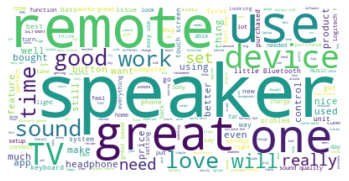

In [48]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
#Splitting data into smaller dataframes for the purpose of Training and Testing
x1 = df.iloc[:5000,13]
x2 = df.iloc[5000:7300,13]
y1 = df.iloc[:5000,14]
y2 = df.iloc[5000:7300,14]
print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)

(5000,)
(2299,)
(5000,)
(2299,)


In [25]:
count_vect = CountVectorizer()
c_train = count_vect.fit_transform(x1.values)
c_test = count_vect.transform(x2.values)
print(c_train.shape)
print(c_test.shape)

(5000, 10005)
(2299, 10005)


In [26]:
#Declaring and applying TFIDF functions to train and test data
tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
tfidf_train = tfidf_vect.fit_transform(x1.values)
tfidf_test=tfidf_vect.transform(x2.values)
print(tfidf_train.shape)
print(tfidf_test.shape)

(5000, 87925)
(2299, 87925)


### MODEL 1: LOGISTIC REGRESSION

In [27]:
tfidf_vect = TfidfVectorizer()
x_tfidf = tfidf_vect.fit_transform(df["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_tfidf,df["sentiment"],test_size=0.3)

log = LogisticRegression(penalty='l2',random_state=0, solver='lbfgs', multi_class='auto', max_iter=500)
log.fit(x_train,y_train)
y_prediction = log.predict(x_test)
f1 = f1_score(y_prediction,y_test)
print('F1 score',f1*100)

F1 score 93.68821292775664


In [28]:
count_vect1 = CountVectorizer()
x_cvect1 = count_vect1.fit_transform(df["lemmatized"])

cx_train, cx_test, cy_train, cy_test = train_test_split(x_cvect1,df["sentiment"],test_size=0.3)

log = LogisticRegression(penalty='l2',random_state=0, solver='lbfgs', multi_class='auto', max_iter=500)
log.fit(cx_train,cy_train)
cy_prediction = log.predict(cx_test)
f1 = f1_score(cy_prediction,cy_test)
print('F1 score',f1*100)

F1 score 94.80042016806722


### MODEL 2: Naive Bayes

####  BERNOULLI NAIVE BAYES
##### Alpha = 0

C:\Users\ramya\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Test_accuracy 79.38234014789039
Train_accuracy 96.7
precision:[0.50299401 0.87486096], reccall:[0.52830189 0.86333699], accuracy:0.7938234014789038, fscore[0.51533742 0.86906077]


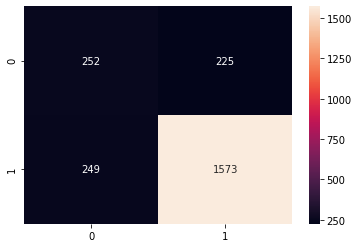

In [29]:
clf = BernoulliNB(alpha=0)
clf.fit(c_train,y1)

y_pred_test = clf.predict(c_test)

test_acc = accuracy_score(y2, clf.predict(c_test), normalize=True)*float(100)
print('Test_accuracy',(test_acc))

train_acc = accuracy_score(y1,clf.predict(c_train),normalize=True)*float(100)
print('Train_accuracy',(train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

##### Alpha = 0.7 (Also the best)

Test_accuracy 82.68812527185733
Train_accuracy 88.4
precision:[0.60821918 0.86814891], reccall:[0.46540881 0.92151482], accuracy:0.8268812527185733, fscore[0.52731591 0.89403621]


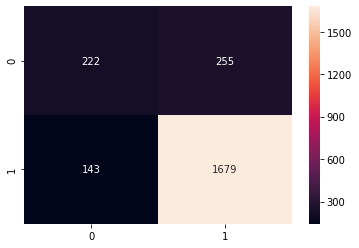

In [30]:
clf = BernoulliNB(alpha=0.7)
clf.fit(c_train,y1)

y_pred_test = clf.predict(c_test)

test_acc = accuracy_score(y2, clf.predict(c_test), normalize=True)*float(100)
print('Test_accuracy',(test_acc))

train_acc = accuracy_score(y1,clf.predict(c_train),normalize=True)*float(100)
print('Train_accuracy',(train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

#### MULTINOMIAL NAIVE BAYES
##### Alpha = 0

Test_accuracy 74.42366246193998
Train_accuracy 97.89999999999999
precision:[0.41004862 0.86682521], reccall:[0.53039832 0.80021954], accuracy:0.7442366246193998, fscore[0.46252285 0.83219178]


C:\Users\ramya\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


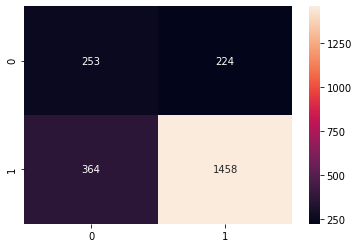

In [31]:
clf = MultinomialNB(alpha=0)
clf.fit(c_train,y1)

y_pred_test = clf.predict(c_test)

test_acc = accuracy_score(y2, clf.predict(c_test), normalize=True)*float(100)
print('Test_accuracy',(test_acc))

train_acc = accuracy_score(y1,clf.predict(c_train),normalize=True)*float(100)
print('Train_accuracy',(train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

##### Alpha = 1.6 (Also the best)

Test_accuracy 82.07916485428447
Train_accuracy 93.67999999999999
precision:[0.65258216 0.8379674 ], reccall:[0.29140461 0.95938529], accuracy:0.8207916485428447, fscore[0.40289855 0.89457523]


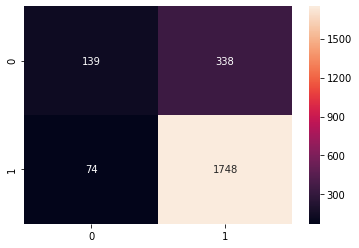

In [32]:
nb_clf = MultinomialNB(alpha=1.6)
nb_clf.fit(c_train,y1)

y_pred_test = nb_clf.predict(c_test)

test_acc = accuracy_score(y2, nb_clf.predict(c_test), normalize=True)*float(100)
print('Test_accuracy',(test_acc))
train_acc = accuracy_score(y1,nb_clf.predict(c_train),normalize=True)*float(100)
print('Train_accuracy',(train_acc))

precision, recall, fscore, support= score(y2,y_pred_test)
print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

sns.heatmap(confusion_matrix(y2,y_pred_test),annot=True,fmt='d')

#### BERNOULLI + TF-IDF

TfIdf Test Accuracy =  79.29534580252283
TfIdf Train Accuracy =  88.06
precision:[0.65258216 0.8379674 ], reccall:[0.29140461 0.95938529], accuracy:0.8207916485428447, fscore[0.40289855 0.89457523]


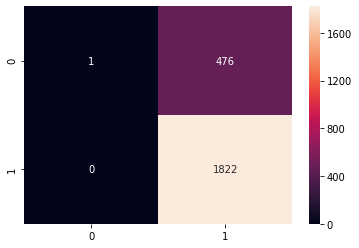

In [33]:
#Applying Function MULTINOMIAL NAIVE BAYES and checking accuracy scores and F-Scores
nb_clf = BernoulliNB(alpha=5)
nb_clf.fit(tfidf_train,y1)

y_pred_tfidf_test = nb_clf.predict(tfidf_test)

tfidf_test_acc = accuracy_score(y2,nb_clf.predict(tfidf_test),normalize=True)*float(100)
print('TfIdf Test Accuracy = ',(tfidf_test_acc))

tfidf_train_acc = accuracy_score(y1,nb_clf.predict(tfidf_train),normalize=True)*float(100)
print('TfIdf Train Accuracy = ',(tfidf_train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_tfidf_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

#### MULTINOMIAL + TF-IDF

##### Alpha = 2 (Also the best)

TfIdf Test Accuracy =  79.25184862983906
TfIdf Train Accuracy =  87.5
precision:[0.65258216 0.8379674 ], reccall:[0.29140461 0.95938529], accuracy:0.8207916485428447, fscore[0.40289855 0.89457523]


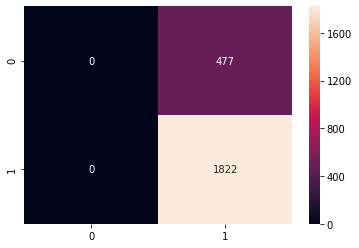

In [34]:
#Applying Function MULTINOMIAL NAIVE BAYES and checking accuracy scores and F-Scores
nb_clf = MultinomialNB(alpha=2)
nb_clf.fit(tfidf_train,y1)

y_pred_tfidf_test = nb_clf.predict(tfidf_test)

tfidf_test_acc = accuracy_score(y2,nb_clf.predict(tfidf_test),normalize=True)*float(100)
print('TfIdf Test Accuracy = ',(tfidf_test_acc))

tfidf_train_acc = accuracy_score(y1,nb_clf.predict(tfidf_train),normalize=True)*float(100)
print('TfIdf Train Accuracy = ',(tfidf_train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_tfidf_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

#### Alpha = 0.3

TfIdf Test Accuracy =  80.55676381035232
TfIdf Train Accuracy =  100.0
precision:[0.65258216 0.8379674 ], reccall:[0.29140461 0.95938529], accuracy:0.8207916485428447, fscore[0.40289855 0.89457523]


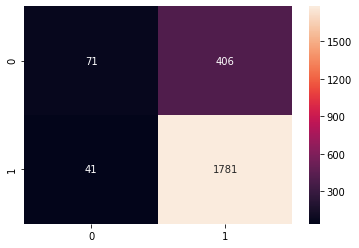

In [35]:
#Applying Function MULTINOMIAL NAIVE BAYES and checking accuracy scores and F-Scores
clf = MultinomialNB(alpha=0.03)
clf.fit(tfidf_train,y1)

y_pred_tfidf_test = clf.predict(tfidf_test)

tfidf_test_acc = accuracy_score(y2,clf.predict(tfidf_test),normalize=True)*float(100)
print('TfIdf Test Accuracy = ',(tfidf_test_acc))

tfidf_train_acc = accuracy_score(y1,clf.predict(tfidf_train),normalize=True)*float(100)
print('TfIdf Train Accuracy = ',(tfidf_train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_tfidf_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

### MODEL 3: SVM CLASSIFIER

#### TF-IDF + SVM: LINEAR

In [36]:
tfidf_vect = TfidfVectorizer()

x_tfidf = tfidf_vect.fit_transform(df["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_tfidf,df["sentiment"],test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

svm = SVC(kernel = 'linear',random_state=0, C = 1.0, verbose=True)
svm.fit(x_train,y_train)

print(svm.score(x_train,y_train))
print(svm.score(x_test, y_test))

(5109, 13277)
(5109,)
(2190,)
(2190, 13277)
[LibSVM]0.9592875318066157
0.9059360730593607


#### BOG + SVM: LINEAR

In [37]:
count_vect1 = CountVectorizer()
x_cvect1 = count_vect1.fit_transform(df["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_cvect1,df["sentiment"],test_size=0.3)

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("x_test shape: ", x_test.shape)

svm = SVC(kernel = 'linear',random_state=0, C = 1.0, verbose=True)
svm.fit(x_train,y_train)

print("SVM Score for train: ", svm.score(x_train,y_train))
print("SVM Score for test: ", svm.score(x_test, y_test))

x_train shape:  (5109, 13277)
y_train shape:  (5109,)
y_test shape:  (2190,)
x_test shape:  (2190, 13277)
[LibSVM]SVM Score for train:  0.9998042669798395
SVM Score for test:  0.9136986301369863


#### TF-IDF + SVM: 'RBF'

In [38]:
tfidf_vect = TfidfVectorizer()
x_tfidf = tfidf_vect.fit_transform(df["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_tfidf,df["sentiment"],test_size=0.3)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("x_test shape: ", x_test.shape)

svm = SVC(kernel = 'rbf',random_state=0, C = 1.0, verbose=True)
svm.fit(x_train,y_train)

print("SVM Score for train: ", svm.score(x_train,y_train))
print("SVM Score for test: ", svm.score(x_test, y_test))

x_train shape:  (5109, 13277)
y_train shape:  (5109,)
y_test shape:  (2190,)
x_test shape:  (2190, 13277)
[LibSVM]

C:\Users\ramya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Score for train:  0.8477197103151302
SVM Score for test:  0.852054794520548


#### BOG + SVM: 'RBF'

In [39]:
count_vect1 = CountVectorizer()
x_cvect1 = count_vect1.fit_transform(df["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_cvect1,df["sentiment"],test_size=0.3)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("x_test shape: ", x_test.shape)

svm = SVC(kernel = 'rbf',random_state=0, C = 1.0, verbose=True)
svm.fit(x_train,y_train)

print("SVM Score for train: ", svm.score(x_train,y_train))
print("SVM Score for test: ", svm.score(x_test, y_test))

x_train shape:  (5109, 13277)
y_train shape:  (5109,)
y_test shape:  (2190,)
x_test shape:  (2190, 13277)
[LibSVM]SVM Score for train:  0.8532002348796242
SVM Score for test:  0.8511415525114155


### MODEL 4: COUNT VECTORIZER + RANDOM FOREST

In [40]:
count_vect = CountVectorizer()
x_count =  count_vect.fit_transform(df["lemmatized"])

In [41]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)

print(cross_val_score (rf , x_count, df["sentiment"], cv = k_fold, scoring='accuracy',n_jobs=-1))

x_train, x_test, y_train, y_test = train_test_split(x_count,df["sentiment"],test_size=0.5)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("x_test shape: ", x_test.shape)


rf = RandomForestClassifier(n_estimators=50,max_depth=20)
rf_model = rf.fit(x_train,y_train)

y_pred = rf_model.predict(x_test)

precision, recall, fscore, support= score(y_test,y_pred)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred==y_test).sum()/len(y_pred),fscore))

[0.90616438 0.91164384 0.91917808 0.8890411  0.84989719]
x_train shape:  (3649, 13277)
y_train shape:  (3649,)
y_test shape:  (3650,)
x_test shape:  (3650, 13277)
precision:[0.90410959 0.86133632], reccall:[0.11743772 0.99773316], accuracy:0.8621917808219178, fscore[0.20787402 0.92453113]
